In [23]:
from main import *

# Preprocessing

## Set the paths based on your Drive directory

In [24]:

data_dir ='data' # Change to the path to your directory
train_images_dir = os.path.join(data_dir, 'Training')
test_images_dir = os.path.join(data_dir, 'Testing')
print(f"Data directory: {data_dir}")
print(f"Training directory: {train_images_dir}")
print(f"Testing directory: {test_images_dir}")

Data directory: data
Training directory: data/Training
Testing directory: data/Testing


## Preprocessing


### Don't touch this block

In [25]:
# Load the training and test data
try:
    train_data, test_data = get_images(train_images_dir, test_images_dir)
    print("Data loading completed successfully.")
    print(f"Number of training samples: {train_data.samples}")
    print(f"Number of test samples: {test_data.samples}")
    print(f"Class names: {train_data.class_indices}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data loading completed successfully.
Number of training samples: 5712
Number of test samples: 1311
Class names: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Training, validation, and test set

In [26]:
X_train, y_train, X_val, y_val = train_val_split(train_data)
X_test, y_test = test_splits(test_data)

Number of batches in the training data: 179
Batch size of a single batch 32
Number of samples in the training dataset 5712

Number of training data batches with val split of 0.2: 144
Number of validation data batches: 35

Shape of image training set: (4608, 30, 30, 1)
Shape of image validation set: (1104, 30, 30, 1)

Shape of label training set: (4608, 4)
Shape of label validation set: (1104, 4)
Number of batches in the test data: 41
Batch size of a single batch 32
Number of samples in the test dataset 1311

Shape of image test set: (1311, 30, 30, 1)

Shape of label test set: (1311, 4)


# model Model

In [27]:
class_names_train = list(train_data.class_indices.keys())
class_names_test = list(test_data.class_indices.keys())

# Hyper parameter tuning
dense units, filters, kernels, max pooling, activation, LR are all tuneable

In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential,  layers, Input, optimizers, callbacks

def hyperparam(activation = 'relu'): 
    model = Sequential()
    model.add(Input(shape = (30, 30, 1)))
    
    model.add(layers.Conv2D(128, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    
    model.add(layers.Conv2D(32, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(16, (3, 3), activation= activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=activation))
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(32, activation = activation))
    model.add(layers.Dropout(rate = 0.25))
    model.add(layers.Dense(16, activation = activation))
    model.add(layers.Dense(4, activation = "softmax"))

    model.compile(optimizer = optimizers.Adam(learning_rate= 0.001), 
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

model = hyperparam()
print(model.summary())

early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience = 10, start_from_epoch= 20, restore_best_weights= True),

history = model.fit(X_train, y_train, batch_size =16, epochs = 30, validation_data = (X_val, y_val), verbose = 1)#, callbacks= early_stopping)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 30, 30, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 15, 15, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 15, 15, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 15, 15, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,900 (1.18 MB)

 Trainable params: 308,420 (1.18 MB)

 Non-trainable params: 480 (1.88 KB)

None
Epoch 1/30


2024-09-23 11:25:01.572343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


288/288 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.4295 - loss: 1.3405 - val_accuracy: 0.2663 - val_loss: 1.4951
Epoch 2/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6187 - loss: 0.9276 - val_accuracy: 0.7283 - val_loss: 0.6778
Epoch 3/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7017 - loss: 0.7759 - val_accuracy: 0.7373 - val_loss: 0.6389
Epoch 4/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7348 - loss: 0.6724 - val_accuracy: 0.7781 - val_loss: 0.5560
Epoch 5/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7704 - loss: 0.5998 - val_accuracy: 0.8062 - val_loss: 0.5182
Epoch 6/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7991 - loss: 0.5468 - val_accuracy: 0.7835 - val_loss: 0.5968
Epoch 7/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8102 - loss: 0.5099 - val_accuracy: 0.8043 - val_loss: 0.4979
Epoch 8/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8335 - loss: 0.4393 - val_accuracy: 0.80

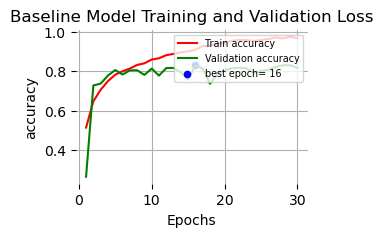

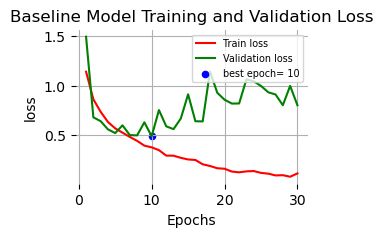

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


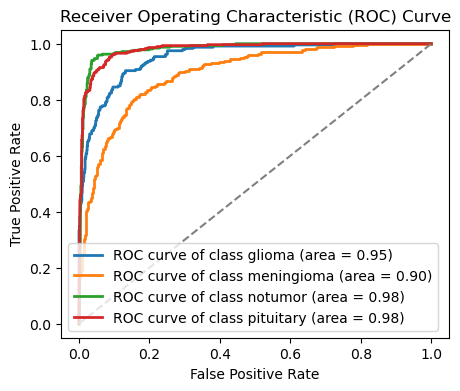

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


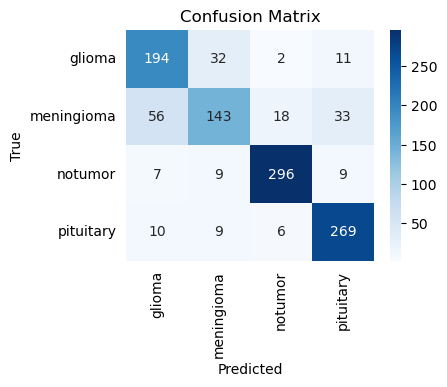

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


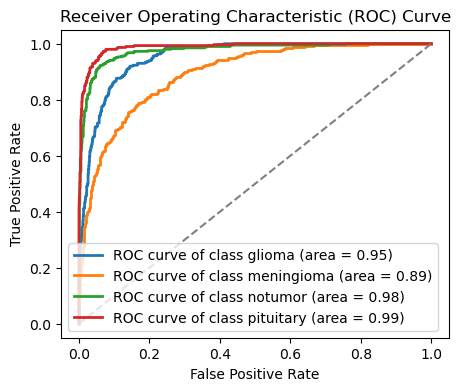

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


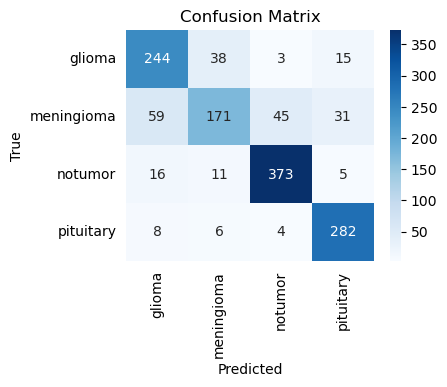

In [29]:
summarize_metric(history, "accuracy")
summarize_metric(history, "loss")

roc_auc_val = plot_roc_curve(model, X_val, y_val, class_names_train)
plot_confusion_matrix(model, X_val, y_val, class_names_train, normalize=False)

roc_auc_val = plot_roc_curve(model, X_test, y_test, class_names_test)
plot_confusion_matrix(model, X_test, y_test, class_names_test, normalize=False)